# This is the code for lab 6, generally, align some reads from _S.oneidensis_ to the human reference genome, filter out the contamination, and make statistical analysis.

# 1. Align the reads to the human genome and collect the reads that couldn't be aligned into a separate FASTQ file, apparently, this separete file will include the reads align to S.oneidensis

# Command used in the terminal 
be131-25@meowth:~$ bowtie2 -p 4 --very-fast --no-unal -x /data/hg19/hg19 -U /data/lab6/illumina_reads.fastq -S ./output.sam --un unsligned1.fastq

***This is the output of the previous command***
1124714 reads; of these:
  1124714 (100.00%) were unpaired; of these:
    1028379 (91.43%) aligned 0 times
    87274 (7.76%) aligned exactly 1 time
    9061 (0.81%) aligned >1 times
8.57% overall alignment rate

then move the generated SAM file and fastq file into the lab6_Zhiyuan Ruan

~/lab6_Zhiyuan Ruan$ bowtie2 -p 4 --very-fast --no-unal -x /data/lab6/shewanella_oneidensis_mr-1 -U unsligned1.fastq -S ./outputofaligned.sam

***This is the output of the previous command***
1028379 reads; of these:
  1028379 (100.00%) were unpaired; of these:
    299560 (29.13%) aligned 0 times
    687571 (66.86%) aligned exactly 1 time
    41248 (4.01%) aligned >1 times
70.87% overall alignment rate

# Convert the filtered SAM to BAM, sort it, index it, and use “depth” to generate a file containing the depth of coverage for every position in the reference genome

**_BAM_**
be131-25@meowth:~/lab6_Zhiyuan Ruan$ samtools view -b outputofaligned.sam > myallignment.bam

**_Sort_**
be131-25@meowth:~/lab6_Zhiyuan Ruan$ samtools sort myallignment.bam > myallignment.sorted.bam

**_index_**
be131-25@meowth:~/lab6_Zhiyuan Ruan$ samtools index myallignment.sorted.bam

**generate a file containing the depth of coverage for every position in the reference genome**
be131-25@meowth:~/lab6_Zhiyuan Ruan$ samtools depth -a  myallignment.sorted.bam > pileup.tab

# Use matplotib to generate a scatter plot and histogram

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys,csv,numpy

depths = []
with open("pileup.tab","r") as f: #parse a tab delimited file into separate lists
    reader = csv.reader(f,delimiter ='\t')
    for name, coordinate, depth in reader:
        depths.append(int(depth))#
print("Max depth", max(depths))
print("Min depth", min(depths))
print("Average depth", numpy.mean(depths))

Max depth 269
Min depth 0
Average depth 36.955644792125895


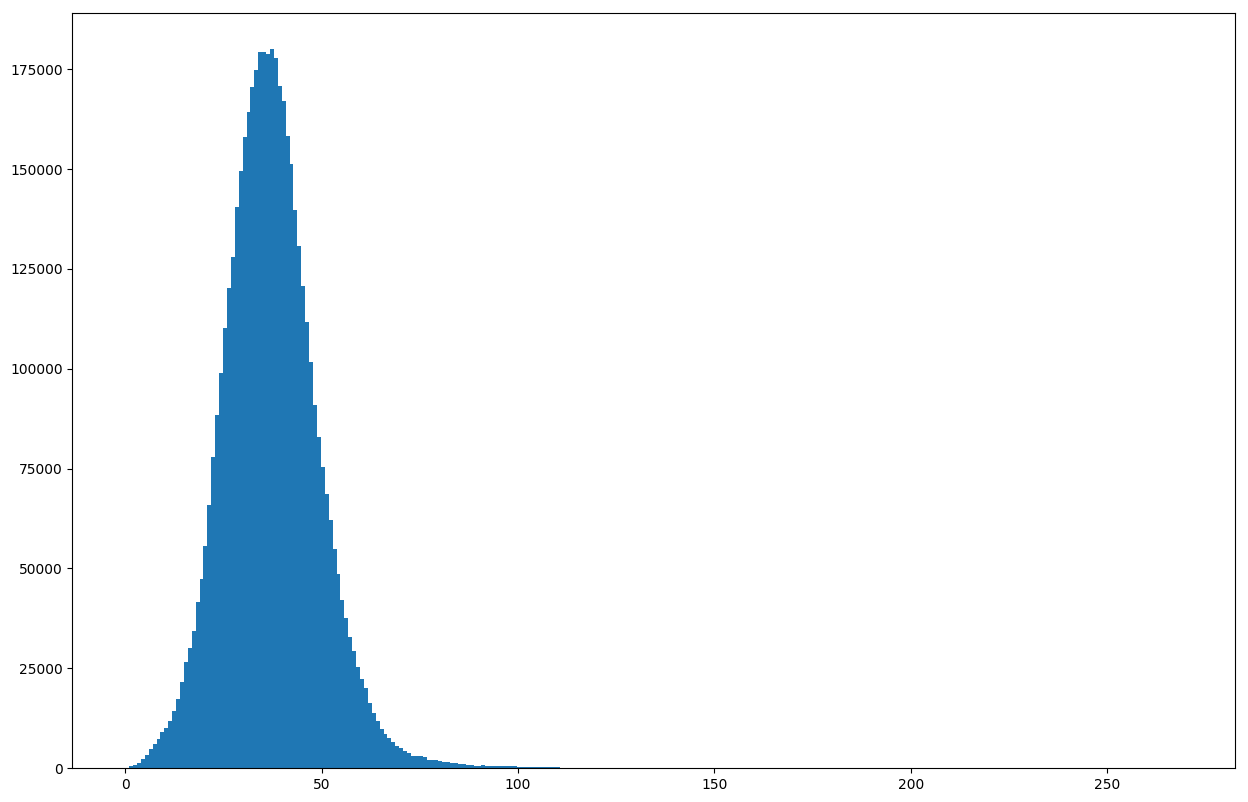

In [32]:
# Plot a coverage histogram
fig = plt.figure(figsize=(15,10),dpi=100)
axes=fig.add_subplot(111)
_ = axes.hist(depths,bins = max(depths)+1)

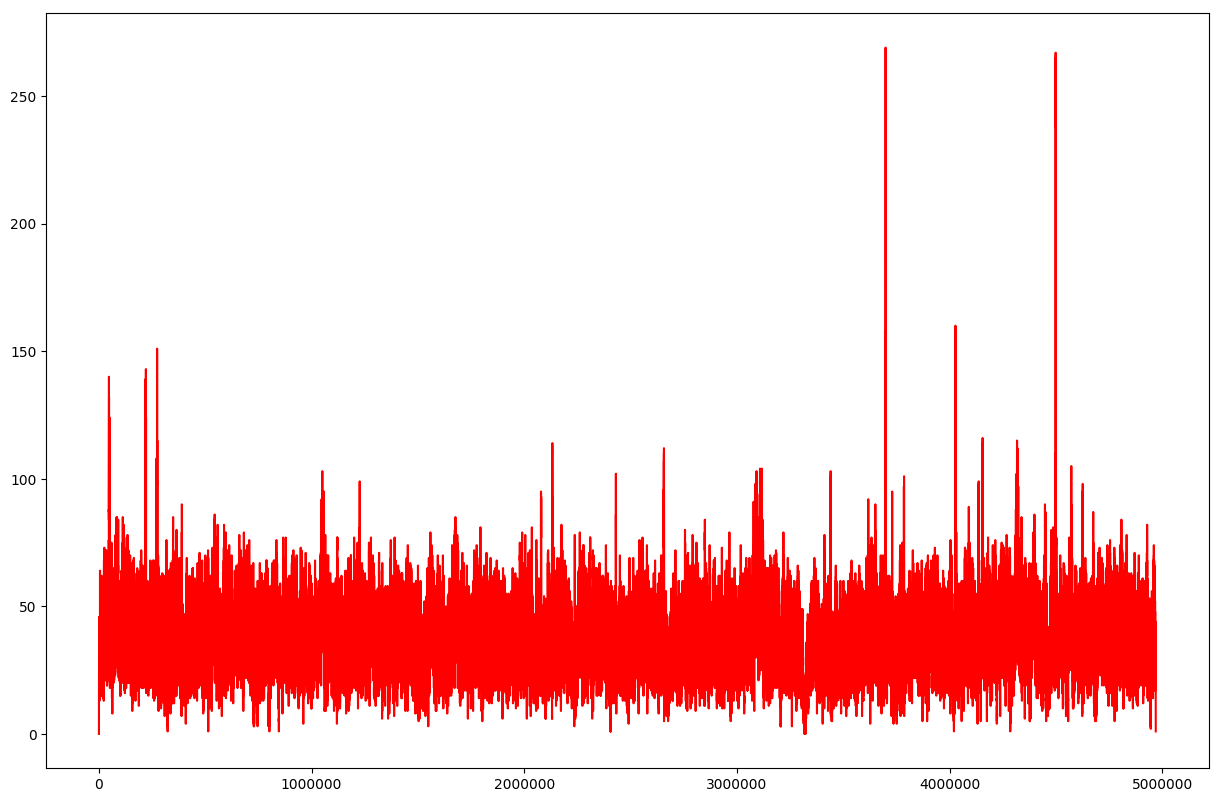

In [25]:
fig = plt.figure(figsize=(15,10), dpi=100)
axes = fig.add_subplot(111)
_ = axes.plot(range(1, len(depths)+1), depths, color='red')

The histogram tells us the distribution of coverage depth looks like a normal distribution.